# Python Developer Practical Test
 
  - Objectives:
    - Use the life expectancy dataset provided in the file "data.csv" to:
      - Perform an exploratory data analysis;
      - Define necessary preprocessing pipelines;
      - Train and evaluate regression models to predict life expectancy;
      - Serialize best model to disk for future use;
      - Prepare a presentation showing the analysis, modeling, decision/actions taken and obtained results;
    - Develop a microservice to expose the model:
       - Service must receive a set of features and return the life expectancy prediction;
       - Service must follow the REST API pattern;
       - Must be a containerized portable service;

  - Dataset Features:
    - Independent Variables:
      - "country": country;
      - "year": year;
      - "status": developed or developing status;
      - "adult_mortality": adult mortality rates by 1000 population;
      - "alcohol": per capita consumption in litres;
      - "bmi": average body mass index of entire population;
      - "expenditure": percentage of total government expenditure on health;
      - "gdp": gross domestic product per capita in USD;
      - "population": population of the country;
      - "icr": human development index regarding income composition of resources;
      - "schooling": year of schooling;
    - Dependent Variable:
      - "life_expectancy": life expectancy in years;

#**Exploratory Data Analysis**



First I imported the basic libraries that are used in any data science project.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Here I have the first contact with the dataset and I use pd.info() to understand its variables.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv", delimiter = ';')
print(df.head())

,country,year,status,adult_mortality,alcohol,bmi,expenditure,gdp,population,icr,schooling,life_expectancy
0,Benin,2000,Developing,279.0,1.34,18.4,4.34,1297.7903583744142,6865951.0,0.389,6.4,53.428292
1,Argentina,2004,Developing,---,7.63,56.3,6.84,4904.363405372001,38728696.0,---,16.3,73.672935
2,Jordan,2003,Developing,127.0,0.54,56.3,9.15,2555.6302176147174,5396774.0,0.717,13.2,73.943941
3,Qatar,2003,Developing,85.0,1.0,64.7,4.14,35468.26032067015,---,0.815,12.8,77.450022
4,Morocco,2003,Developing,146.0,0.58,47.3,5.25,2710.699110815542,29843937.0,0.551,9.3,70.982587


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          2013 non-null   object 
 1   year             2013 non-null   int64  
 2   status           2013 non-null   object 
 3   adult_mortality  2013 non-null   object 
 4   alcohol          2013 non-null   object 
 5   bmi              2013 non-null   object 
 6   expenditure      2013 non-null   object 
 7   gdp              2013 non-null   object 
 8   population       2013 non-null   object 
 9   icr              2013 non-null   object 
 10  schooling        2013 non-null   object 
 11  life_expectancy  2013 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 188.8+ KB


##Pre-processing

After noticing the presence of "---" in the missing data, and that this prevented the conversion of type Objetc (String) to a numeric variable (Float), I use pd.replace( ) to replace it with None and be able to transform in numeric variable using pd.astype(float).

In [ ]:
df.replace(['---'], [None], inplace=True)

In [ ]:
df['adult_mortality'] = df['adult_mortality'].astype(float)
df['alcohol'] = df['alcohol'].astype(float)
df['bmi'] = df['bmi'].astype(float)
df['expenditure'] = df['expenditure'].astype(float)
df['gdp'] = df['gdp'].astype(float)
df['population'] = df['population'].astype(float)
df['icr'] = df['icr'].astype(float)
df['schooling'] = df['schooling'].astype(float)

In [ ]:
print(df.head())

,country,year,status,adult_mortality,alcohol,bmi,expenditure,gdp,population,icr,schooling,life_expectancy
0,Benin,2000,Developing,279.0,1.34,18.4,4.34,1297.790358,6865951.0,0.389,6.4,53.428292
1,Argentina,2004,Developing,NaN,7.63,56.3,6.84,4904.363405,38728696.0,NaN,16.3,73.672935
2,Jordan,2003,Developing,127.0,0.54,56.3,9.15,2555.630218,5396774.0,0.717,13.2,73.943941
3,Qatar,2003,Developing,85.0,1.00,64.7,4.14,35468.260321,NaN,0.815,12.8,77.450022
4,Morocco,2003,Developing,146.0,0.58,47.3,5.25,2710.699111,29843937.0,0.551,9.3,70.982587


But even so, it was still necessary to process the missing data. In data science, missing data is dealt with using two methods: imputation or removal of data.

In this case I chose to use the imputation method, where I filled in the missing data with the average of each of its own columns, using pd.fillna(pd.mean(  ) ).

In [ ]:
df['adult_mortality'] = df['adult_mortality'].fillna(df['adult_mortality'].mean())
df['alcohol'] = df['alcohol'].fillna(df['alcohol'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['expenditure'] = df['expenditure'].fillna(df['expenditure'].mean())
df['gdp'] = df['gdp'].fillna(df['gdp'].mean())
df['population'] = df['population'].fillna(df['population'].mean())
df['icr'] = df['icr'].fillna(df['icr'].mean())
df['schooling'] = df['schooling'].fillna(df['schooling'].mean())

The dataset documentation says that the "Status" variable has only two values: developed or developing.

However, when observing the dataframe, different values ​​were found, and as it is a categorical variable, it is not possible to fill it based on statistical methods. Then, the data removal method was used to deal with such data.

In [ ]:
print(df['status'].unique())

array(['Developing', 'Developed', '32431f7de017', 'f8f26503558f',
       '947de8f28a97'], dtype=object)

In [ ]:
indx1 = df[df['status'] == '947de8f28a97'].index
indx2 = df[df['status'] == 'f8f26503558f'].index
indx3 = df[df['status'] == '32431f7de017'].index

In [ ]:
df.drop(indx1, inplace=True)
df.drop(indx2, inplace=True)
df.drop(indx3, inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2012
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          1993 non-null   object 
 1   year             1993 non-null   int64  
 2   status           1993 non-null   object 
 3   adult_mortality  1993 non-null   float64
 4   alcohol          1993 non-null   float64
 5   bmi              1993 non-null   float64
 6   expenditure      1993 non-null   float64
 7   gdp              1993 non-null   float64
 8   population       1993 non-null   float64
 9   icr              1993 non-null   float64
 10  schooling        1993 non-null   float64
 11  life_expectancy  1993 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 202.4+ KB


In [ ]:
print(df['status'].unique())

array(['Developing', 'Developed'], dtype=object)

In [ ]:
print(df.head())

,country,year,status,adult_mortality,alcohol,bmi,expenditure,gdp,population,icr,schooling,life_expectancy
0,Benin,2000,Developing,279.000000,1.34,18.4,4.34,1297.790358,6.865951e+06,0.389000,6.4,53.428292
1,Argentina,2004,Developing,172.686715,7.63,56.3,6.84,4904.363405,3.872870e+07,0.597623,16.3,73.672935
2,Jordan,2003,Developing,127.000000,0.54,56.3,9.15,2555.630218,5.396774e+06,0.717000,13.2,73.943941
3,Qatar,2003,Developing,85.000000,1.00,64.7,4.14,35468.260321,1.234228e+07,0.815000,12.8,77.450022
4,Morocco,2003,Developing,146.000000,0.58,47.3,5.25,2710.699111,2.984394e+07,0.551000,9.3,70.982587


##Data Visualization

Adult Mortality increases life expetancy decrease

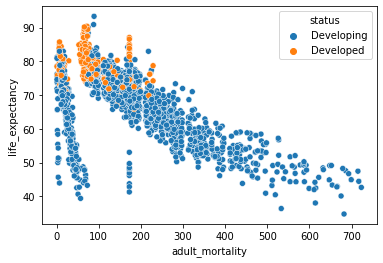

In [ ]:
sns.scatterplot(data=df, x="adult_mortality", y="life_expectancy", hue="status")
print(plt.show())

If Schooling is more then life expectancy is more, here also this case is more in developed countries.

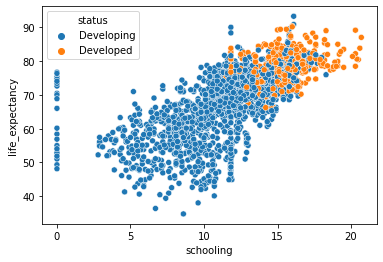

In [ ]:
sns.scatterplot(data=df, x="schooling", y="life_expectancy", hue="status")
print(plt.show())

Alcohol does not show any significant impact on life expectancy


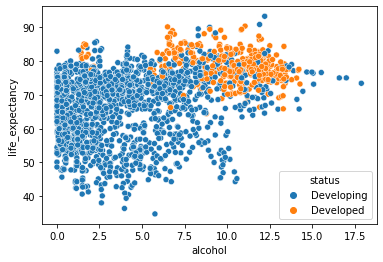

In [ ]:
sns.scatterplot(data=df, x="alcohol", y="life_expectancy", hue="status")
print(plt.show())

Percentage expenditure also does not show any significant impact on life expectancy

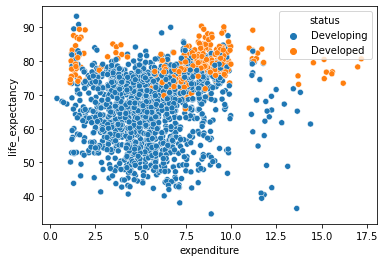

In [ ]:
sns.scatterplot(data=df, x="expenditure", y="life_expectancy", hue="status")
print(plt.show())

If bmi is less, life expectancy is also less

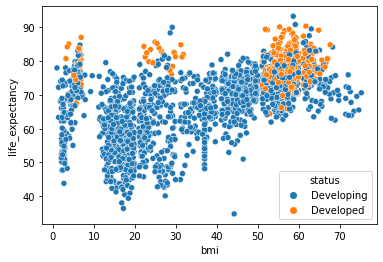

In [ ]:
sns.scatterplot(data=df, x="bmi", y="life_expectancy", hue="status")
print(plt.show())


lower GDP means lower life expectancy


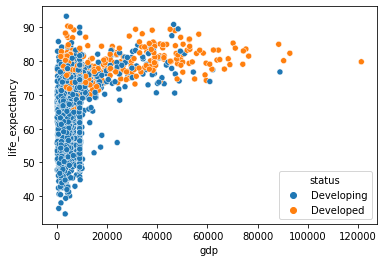

In [ ]:
sns.scatterplot(data=df, x="gdp", y="life_expectancy", hue="status")
print(plt.show())

As we ca see from the graph that if population is more then life expectancy is low.

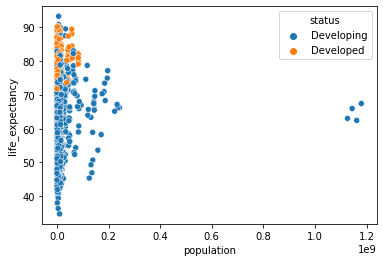

In [ ]:
sns.scatterplot(data=df, x="population", y="life_expectancy", hue="status")
print(plt.show())

Higher ICR means longer life expectancy

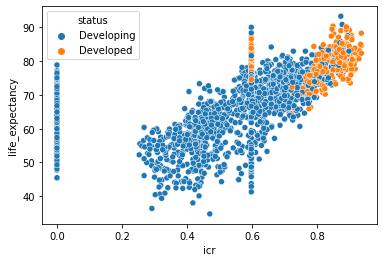

In [ ]:
sns.scatterplot(data=df, x="icr", y="life_expectancy", hue="status")
print(plt.show())

The heat map shows us that BMI, education and ICR are the features with the highest correlation with life expectancy.

But a positive correlation was also seen with GDP, Alcohol and expenditure

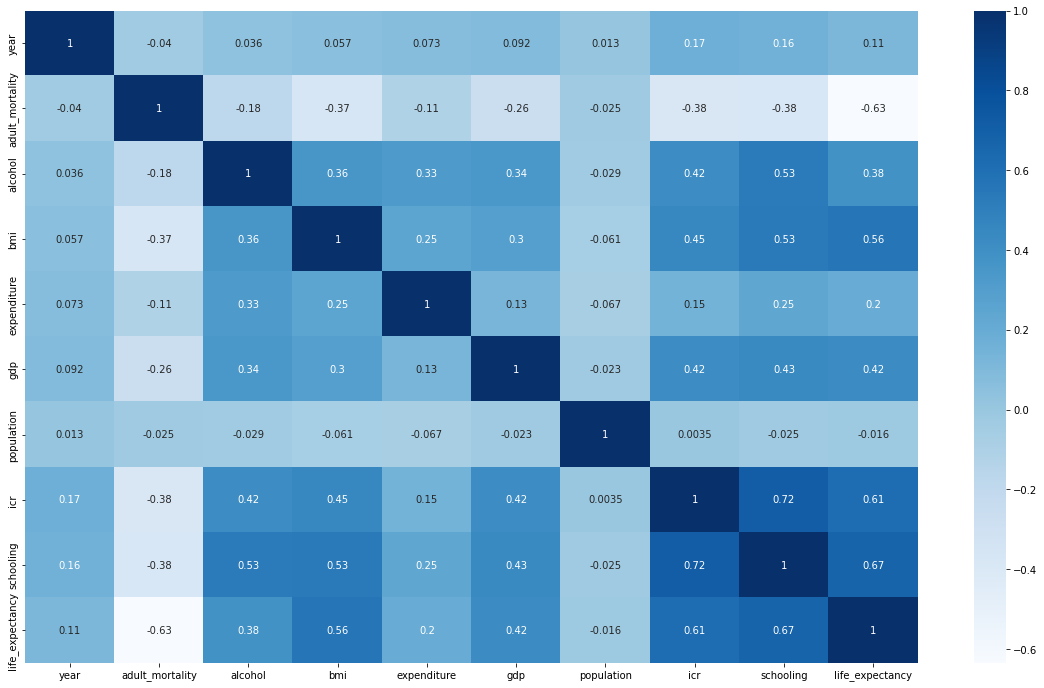

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
print(plt.show())

#Model


##Random Forest

In [ ]:
print(df.head(2))

,country,year,status,adult_mortality,alcohol,bmi,expenditure,gdp,population,icr,schooling,life_expectancy
0,Benin,2000,Developing,279.000000,1.34,18.4,4.34,1297.790358,6865951.0,0.389000,6.4,53.428292
1,Argentina,2004,Developing,172.686715,7.63,56.3,6.84,4904.363405,38728696.0,0.597623,16.3,73.672935


In [ ]:
X = df.drop('life_expectancy', axis=1)
y=df['life_expectancy']

In [ ]:
Country_dummy=pd.get_dummies(df['country'])
status_dummy=pd.get_dummies(df['status'])
X.drop(['country','status'],inplace=True,axis=1)
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rgs=RandomForestRegressor(n_estimators=300,criterion='squared_error',random_state=0)

In [ ]:
rgs.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [ ]:
y_pred=rgs.predict(X_test)

In [ ]:
from sklearn import metrics

print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Accuracy score of {}: {:.2f}%".format(rgs, metrics.r2_score(y_test, y_pred)*100))

RMSE= 3.129456521637486
Accuracy score of RandomForestRegressor(n_estimators=300, random_state=0): 89.60%


In [ ]:
finalData = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(finalData.head())

,Actual,Predicted
1823,51.657994,57.207794
1326,74.901389,74.543064
971,73.300213,76.230415
108,77.136850,78.266852
1575,71.008306,73.305394


##Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()

Linear_model.fit(X_train,y_train)
print("Accuracy score of {}: {:.2f}%".format(Linear_model, Linear_model.score(X_train,y_train)*100))

Accuracy score of LinearRegression(): 91.66%


In [ ]:
pred=Linear_model.predict(X_test)

In [ ]:
finalData_2 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(finalData_2.head())

,Actual,Predicted
1823,51.657994,56.322304
1326,74.901389,74.059843
971,73.300213,74.611874
108,77.136850,81.572646
1575,71.008306,72.088162


#Conclusion

Random Forest Regressor model gives us 89,60% accuracy.

Linear Regression model give us 91,66% accuracy.